In [ ]:
import googleapiclient
from googleapiclient.discovery import build 
import pandas as pd
from IPython.display import JSON

# Data viz packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

In [ ]:
api_key = '-'

In [ ]:
channel_ids = ['UCz9F9eEkt2KcLXZt--M6vjA'
               #more channels here
              ]

In [ ]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = googleapiclient.discovery.build(
        api_service_name, api_version, developerKey=api_key)

In [ ]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )
    response = request.execute()

   #loop through items
    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
               'subscribers': item['statistics']['subscriberCount'],
               'views': item['statistics']['viewCount'],
               'totalVideos': item['statistics']['videoCount'],
               'playlistId' : item['contentDetails']['relatedPlaylists']['uploads']
        }        
        all_data.append(data)

    return(pd.DataFrame(all_data))

In [ ]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [ ]:
channel_stats

In [ ]:
playlist_id = "UUz9F9eEkt2KcLXZt--M6vjA"

def get_video_ids(youtube, playlist_id):
    
    video_ids = []
    
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=playlist_id,
        maxResults = 50
    )
    response = request.execute()
    
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:
        request = youtube.playlistItems().list(
                    part='contentDetails',
                    playlistId = playlist_id,
                    maxResults = 50,
                    pageToken = next_page_token)
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = response.get('nextPageToken')
        
    return video_ids

In [ ]:
# Get video IDs
video_ids = get_video_ids(youtube,playlist_id)

In [ ]:
len(video_ids)

In [ ]:
def get_video_details(youtube, video_ids):

    all_video_info = []

    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute()

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle','title','description','tags','publishedAt'],
                              'statistics': ['viewCount', 'likeCount','favouriteCount','commentCount'],
                              'contentDetails': ['duration','definition','caption']
                             }
                              
            video_info = {}
            video_info['video_id'] = video['id']
 
            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                       video_info[v] = video[k][v]
                    except:
                       video_info[v] = None
                
            all_video_info.append(video_info)
    
    return pd.DataFrame(all_video_info)

In [39]:
# Get video details
video_df = get_video_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,1IFintWb9_E,Breanna Quan,introvert diaries 📁 productive days getting my...,Hello Friends!\n\n💡 Get your ideas out into th...,"[morning routine, day in my life, productive d...",2024-07-14T15:30:00Z,70467,5185,None,117,PT13M26S,hd,false
1,xFf737nFugM,Breanna Quan,"slice of life 💌 days in my life, funny story b...",Hello Friends!\n\ni hope you enjoy this girls ...,"[breanna quan, study vlog, slice of life, summ...",2024-07-07T15:32:40Z,88896,6017,None,166,PT12M41S,hd,false
2,GPxKwQrayKw,Breanna Quan,"MIAMI VLOG ☀️ summer wardrobe essentials, beac...",Hello Friends!\n\nIf you want to shop the SKIM...,"[breanna quan, travel vlog, day in my life, tr...",2024-06-30T15:32:23Z,100351,6394,None,132,PT13M42S,hd,false
3,2XiMdGB5cQU,Breanna Quan,"KOREA VLOG ☁️ cute cafes, train to busan, what...",Hello Friends!\n\ni have a few things in the w...,"[korea vlog, travel vlog, korea diaries, saran...",2024-06-26T15:30:00Z,101651,5874,None,153,PT11M57S,hd,false
4,UmMjOumVcAU,Breanna Quan,"STUDY VLOG 🖇 waking up at 5am, uni days in my ...",Hello Friends!\n\nwelcome to episode 17 of the...,"[study vlog, breanna quan, productive day in m...",2024-06-13T15:30:08Z,211243,10990,None,237,PT11M46S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,98qK4NOtslE,Breanna Quan,DESK TOUR | Organizing My Study Space,Hello Friends!\n(this was suppose to be posted...,"[desk tour, desk, desk organization, study, ro...",2019-09-04T01:15:54Z,26443,866,None,19,PT10M40S,hd,false
170,3QiUcACEKYo,Breanna Quan,BACK TO SCHOOL EVERYDAY MAKEUP GRWM *drugstore*,Hello Friends!\nMake sure to watch in HD (:\n\...,"[Back to school, back to school makeup, everyd...",2019-08-26T04:09:27Z,14594,631,None,35,PT11M6S,hd,false
171,WLOrBwKnKA0,Breanna Quan,HOT GIRL SUMMER MAKEUP | pink eyeshadow look,Hello friends!\nMake sure to watch in HD!!\n\n...,"[makeup, summer, pink, hot girl summer, makeup...",2019-08-07T16:17:03Z,6978,254,None,39,PT11M4S,hd,false
172,5qZptQfWkfA,Breanna Quan,BUSTED TO BADDIE MAKEUP GRWM,Hello Friends!\nMake sure to watch in HD!!\n\n...,"[grwm, get, ready, with, me, beauty, makeup, f...",2019-07-10T11:34:11Z,34953,1097,None,59,PT13M53S,hd,false


In [40]:
def get_comments_in_videos(youtube, video_ids):
    all_comments = []

    for video_id in video_ids:
        request = youtube.commentThreads().list(
            part="snippet,replies",
            videoId=video_id
        )
        response = request.execute()

        comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items']
        ]
        comments_in_video_info = {'video_id': video_id, 'comments': comments_in_video}

        all_comments.append(comments_in_video_info)

    return pd.DataFrame(all_comments)

In [ ]:
comments_df = get_comments_in_videos(youtube, video_ids)
comments_df

In [ ]:
comments_df['comments'][0]

In [ ]:
## Data pre-processing

In [47]:
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
dtype: bool

In [48]:
video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [50]:
numeric_cols = ['viewCount','likeCount','favouriteCount','commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [60]:
# Publish day in the week
from dateutil import parser
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x))
video_df['publishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A"))

In [61]:
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [54]:
video_df[['durationSecs','duration']]

,durationSecs,duration
0,0 days 00:13:26,PT13M26S
1,0 days 00:12:41,PT12M41S
2,0 days 00:13:42,PT13M42S
3,0 days 00:11:57,PT11M57S
4,0 days 00:11:46,PT11M46S
...,...,...
169,0 days 00:10:40,PT10M40S
170,0 days 00:11:06,PT11M6S
171,0 days 00:11:04,PT11M4S
172,0 days 00:13:53,PT13M53S


In [ ]:
# Add tag count
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [62]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,durationSecs,publishDayName
0,1IFintWb9_E,Breanna Quan,introvert diaries 📁 productive days getting my...,Hello Friends!\n\n💡 Get your ideas out into th...,"[morning routine, day in my life, productive d...",2024-07-14 15:30:00+00:00,70467.0,5185.0,NaN,117.0,PT13M26S,hd,false,0 days 00:13:26,Sunday
1,xFf737nFugM,Breanna Quan,"slice of life 💌 days in my life, funny story b...",Hello Friends!\n\ni hope you enjoy this girls ...,"[breanna quan, study vlog, slice of life, summ...",2024-07-07 15:32:40+00:00,88896.0,6017.0,NaN,166.0,PT12M41S,hd,false,0 days 00:12:41,Sunday
2,GPxKwQrayKw,Breanna Quan,"MIAMI VLOG ☀️ summer wardrobe essentials, beac...",Hello Friends!\n\nIf you want to shop the SKIM...,"[breanna quan, travel vlog, day in my life, tr...",2024-06-30 15:32:23+00:00,100351.0,6394.0,NaN,132.0,PT13M42S,hd,false,0 days 00:13:42,Sunday
3,2XiMdGB5cQU,Breanna Quan,"KOREA VLOG ☁️ cute cafes, train to busan, what...",Hello Friends!\n\ni have a few things in the w...,"[korea vlog, travel vlog, korea diaries, saran...",2024-06-26 15:30:00+00:00,101651.0,5874.0,NaN,153.0,PT11M57S,hd,false,0 days 00:11:57,Wednesday
4,UmMjOumVcAU,Breanna Quan,"STUDY VLOG 🖇 waking up at 5am, uni days in my ...",Hello Friends!\n\nwelcome to episode 17 of the...,"[study vlog, breanna quan, productive day in m...",2024-06-13 15:30:08+00:00,211243.0,10990.0,NaN,237.0,PT11M46S,hd,false,0 days 00:11:46,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,98qK4NOtslE,Breanna Quan,DESK TOUR | Organizing My Study Space,Hello Friends!\n(this was suppose to be posted...,"[desk tour, desk, desk organization, study, ro...",2019-09-04 01:15:54+00:00,26443.0,866.0,NaN,19.0,PT10M40S,hd,false,0 days 00:10:40,Wednesday
170,3QiUcACEKYo,Breanna Quan,BACK TO SCHOOL EVERYDAY MAKEUP GRWM *drugstore*,Hello Friends!\nMake sure to watch in HD (:\n\...,"[Back to school, back to school makeup, everyd...",2019-08-26 04:09:27+00:00,14594.0,631.0,NaN,35.0,PT11M6S,hd,false,0 days 00:11:06,Monday
171,WLOrBwKnKA0,Breanna Quan,HOT GIRL SUMMER MAKEUP | pink eyeshadow look,Hello friends!\nMake sure to watch in HD!!\n\n...,"[makeup, summer, pink, hot girl summer, makeup...",2019-08-07 16:17:03+00:00,6978.0,254.0,NaN,39.0,PT11M4S,hd,false,0 days 00:11:04,Wednesday
172,5qZptQfWkfA,Breanna Quan,BUSTED TO BADDIE MAKEUP GRWM,Hello Friends!\nMake sure to watch in HD!!\n\n...,"[grwm, get, ready, with, me, beauty, makeup, f...",2019-07-10 11:34:11+00:00,34953.0,1097.0,NaN,59.0,PT13M53S,hd,false,0 days 00:13:53,Wednesday


In [63]:
# Add tag count
video_df['tagCount'] = video_df['tags'].apply(lambda x:0 if x is None else len(x))

In [64]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,durationSecs,publishDayName,tagCount
0,1IFintWb9_E,Breanna Quan,introvert diaries 📁 productive days getting my...,Hello Friends!\n\n💡 Get your ideas out into th...,"[morning routine, day in my life, productive d...",2024-07-14 15:30:00+00:00,70467.0,5185.0,NaN,117.0,PT13M26S,hd,false,0 days 00:13:26,Sunday,16
1,xFf737nFugM,Breanna Quan,"slice of life 💌 days in my life, funny story b...",Hello Friends!\n\ni hope you enjoy this girls ...,"[breanna quan, study vlog, slice of life, summ...",2024-07-07 15:32:40+00:00,88896.0,6017.0,NaN,166.0,PT12M41S,hd,false,0 days 00:12:41,Sunday,10
2,GPxKwQrayKw,Breanna Quan,"MIAMI VLOG ☀️ summer wardrobe essentials, beac...",Hello Friends!\n\nIf you want to shop the SKIM...,"[breanna quan, travel vlog, day in my life, tr...",2024-06-30 15:32:23+00:00,100351.0,6394.0,NaN,132.0,PT13M42S,hd,false,0 days 00:13:42,Sunday,15
3,2XiMdGB5cQU,Breanna Quan,"KOREA VLOG ☁️ cute cafes, train to busan, what...",Hello Friends!\n\ni have a few things in the w...,"[korea vlog, travel vlog, korea diaries, saran...",2024-06-26 15:30:00+00:00,101651.0,5874.0,NaN,153.0,PT11M57S,hd,false,0 days 00:11:57,Wednesday,11
4,UmMjOumVcAU,Breanna Quan,"STUDY VLOG 🖇 waking up at 5am, uni days in my ...",Hello Friends!\n\nwelcome to episode 17 of the...,"[study vlog, breanna quan, productive day in m...",2024-06-13 15:30:08+00:00,211243.0,10990.0,NaN,237.0,PT11M46S,hd,false,0 days 00:11:46,Thursday,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,98qK4NOtslE,Breanna Quan,DESK TOUR | Organizing My Study Space,Hello Friends!\n(this was suppose to be posted...,"[desk tour, desk, desk organization, study, ro...",2019-09-04 01:15:54+00:00,26443.0,866.0,NaN,19.0,PT10M40S,hd,false,0 days 00:10:40,Wednesday,33
170,3QiUcACEKYo,Breanna Quan,BACK TO SCHOOL EVERYDAY MAKEUP GRWM *drugstore*,Hello Friends!\nMake sure to watch in HD (:\n\...,"[Back to school, back to school makeup, everyd...",2019-08-26 04:09:27+00:00,14594.0,631.0,NaN,35.0,PT11M6S,hd,false,0 days 00:11:06,Monday,33
171,WLOrBwKnKA0,Breanna Quan,HOT GIRL SUMMER MAKEUP | pink eyeshadow look,Hello friends!\nMake sure to watch in HD!!\n\n...,"[makeup, summer, pink, hot girl summer, makeup...",2019-08-07 16:17:03+00:00,6978.0,254.0,NaN,39.0,PT11M4S,hd,false,0 days 00:11:04,Wednesday,45
172,5qZptQfWkfA,Breanna Quan,BUSTED TO BADDIE MAKEUP GRWM,Hello Friends!\nMake sure to watch in HD!!\n\n...,"[grwm, get, ready, with, me, beauty, makeup, f...",2019-07-10 11:34:11+00:00,34953.0,1097.0,NaN,59.0,PT13M53S,hd,false,0 days 00:13:53,Wednesday,42


In [65]:
### Best performing videos

C:\Users\Onyinye\AppData\Local\Temp\ipykernel_12316\73220587.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
\\?\C:\Users\Onyinye\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128133 (\N{NAIL POLISH}) missing from current font.
  func(*args, **kwargs)
\\?\C:\Users\Onyinye\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  func(*args, **kwargs)
\\?\C:\Users\Onyinye\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128705 (\N{BATHTUB}) missing from current font.
  func(*args, **kwargs)
\\?\C:\Users\Onyinye\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\IPython\core

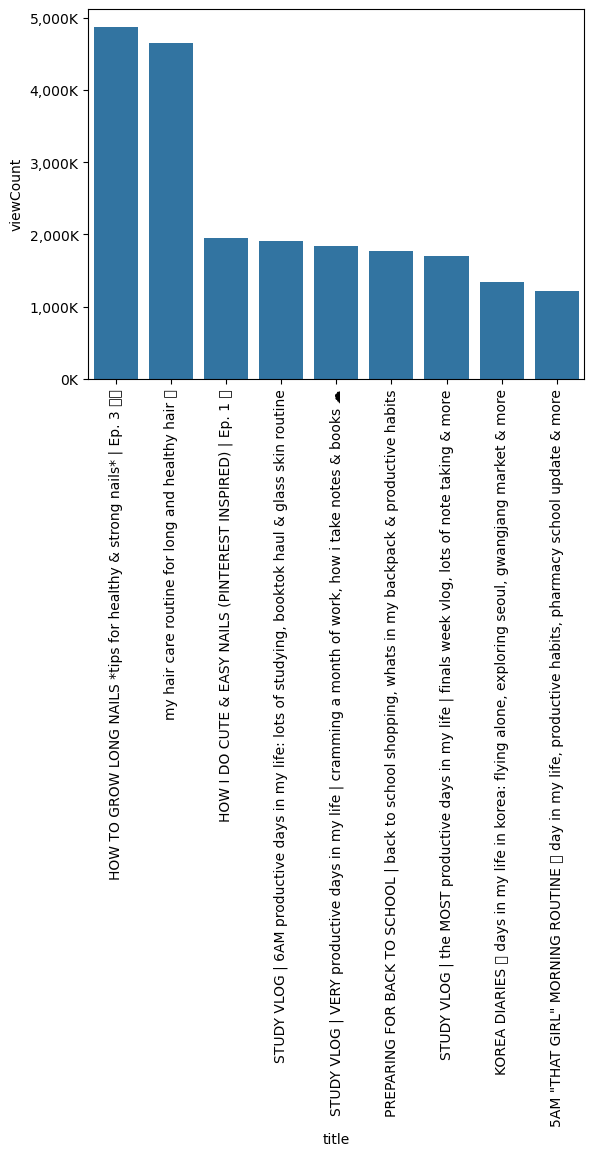

In [80]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

C:\Users\Onyinye\AppData\Local\Temp\ipykernel_12316\171811544.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
\\?\C:\Users\Onyinye\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129525 (\N{SPOOL OF THREAD}) missing from current font.
  func(*args, **kwargs)
\\?\C:\Users\Onyinye\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129321 (\N{GRINNING FACE WITH STAR EYES}) missing from current font.
  func(*args, **kwargs)
\\?\C:\Users\Onyinye\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127876 (\N{CHRISTMAS TREE}) missing from current font.
  func(*args, **kwargs)
\\?\C:\Users\Onyinye\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\IPython

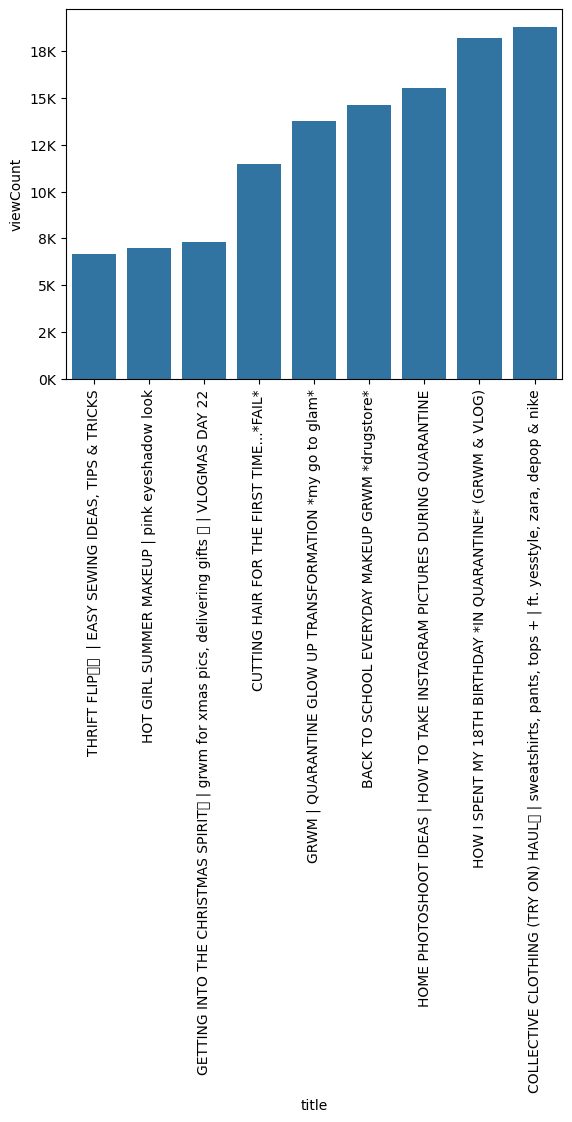

In [81]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

In [ ]:
### View distribution per video

<Axes: xlabel='channelTitle', ylabel='viewCount'>

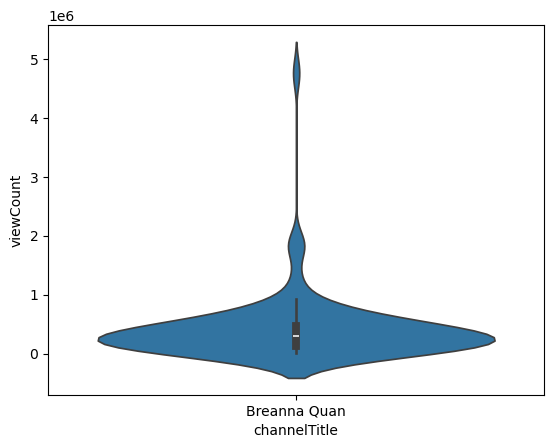

In [85]:
if not pd.api.types.is_numeric_dtype(video_df['viewCount']):
  # Convert to numeric if necessary (replace with appropriate conversion if needed)
  video_df['viewCount'] = pd.to_numeric(video_df['viewCount'], errors='coerce')

sns.violinplot(x="channelTitle", y="viewCount", data=video_df)

In [ ]:
### Views vs. likes and comments

<Axes: xlabel='likeCount', ylabel='viewCount'>

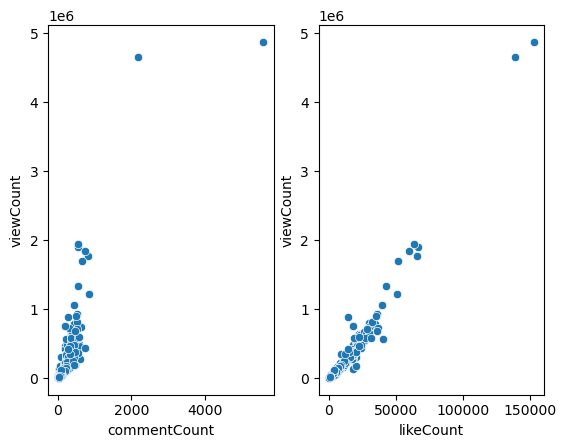

In [86]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax = ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax = ax[1])

In [ ]:
### Video duration

<Axes: xlabel='durationSecs', ylabel='Count'>

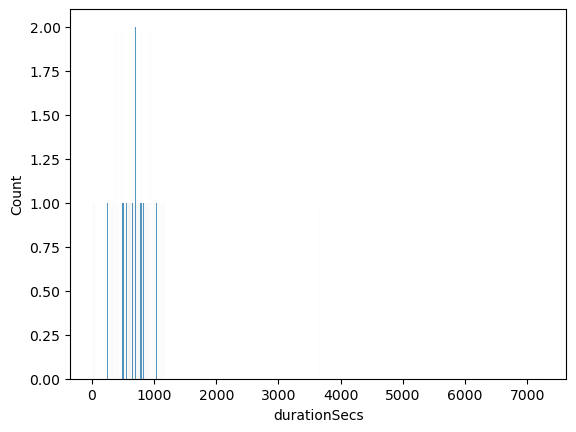

In [89]:
sns.histplot(data = video_df, x = 'durationSecs', bins=30)

In [ ]:
### Wordcloud for video titles

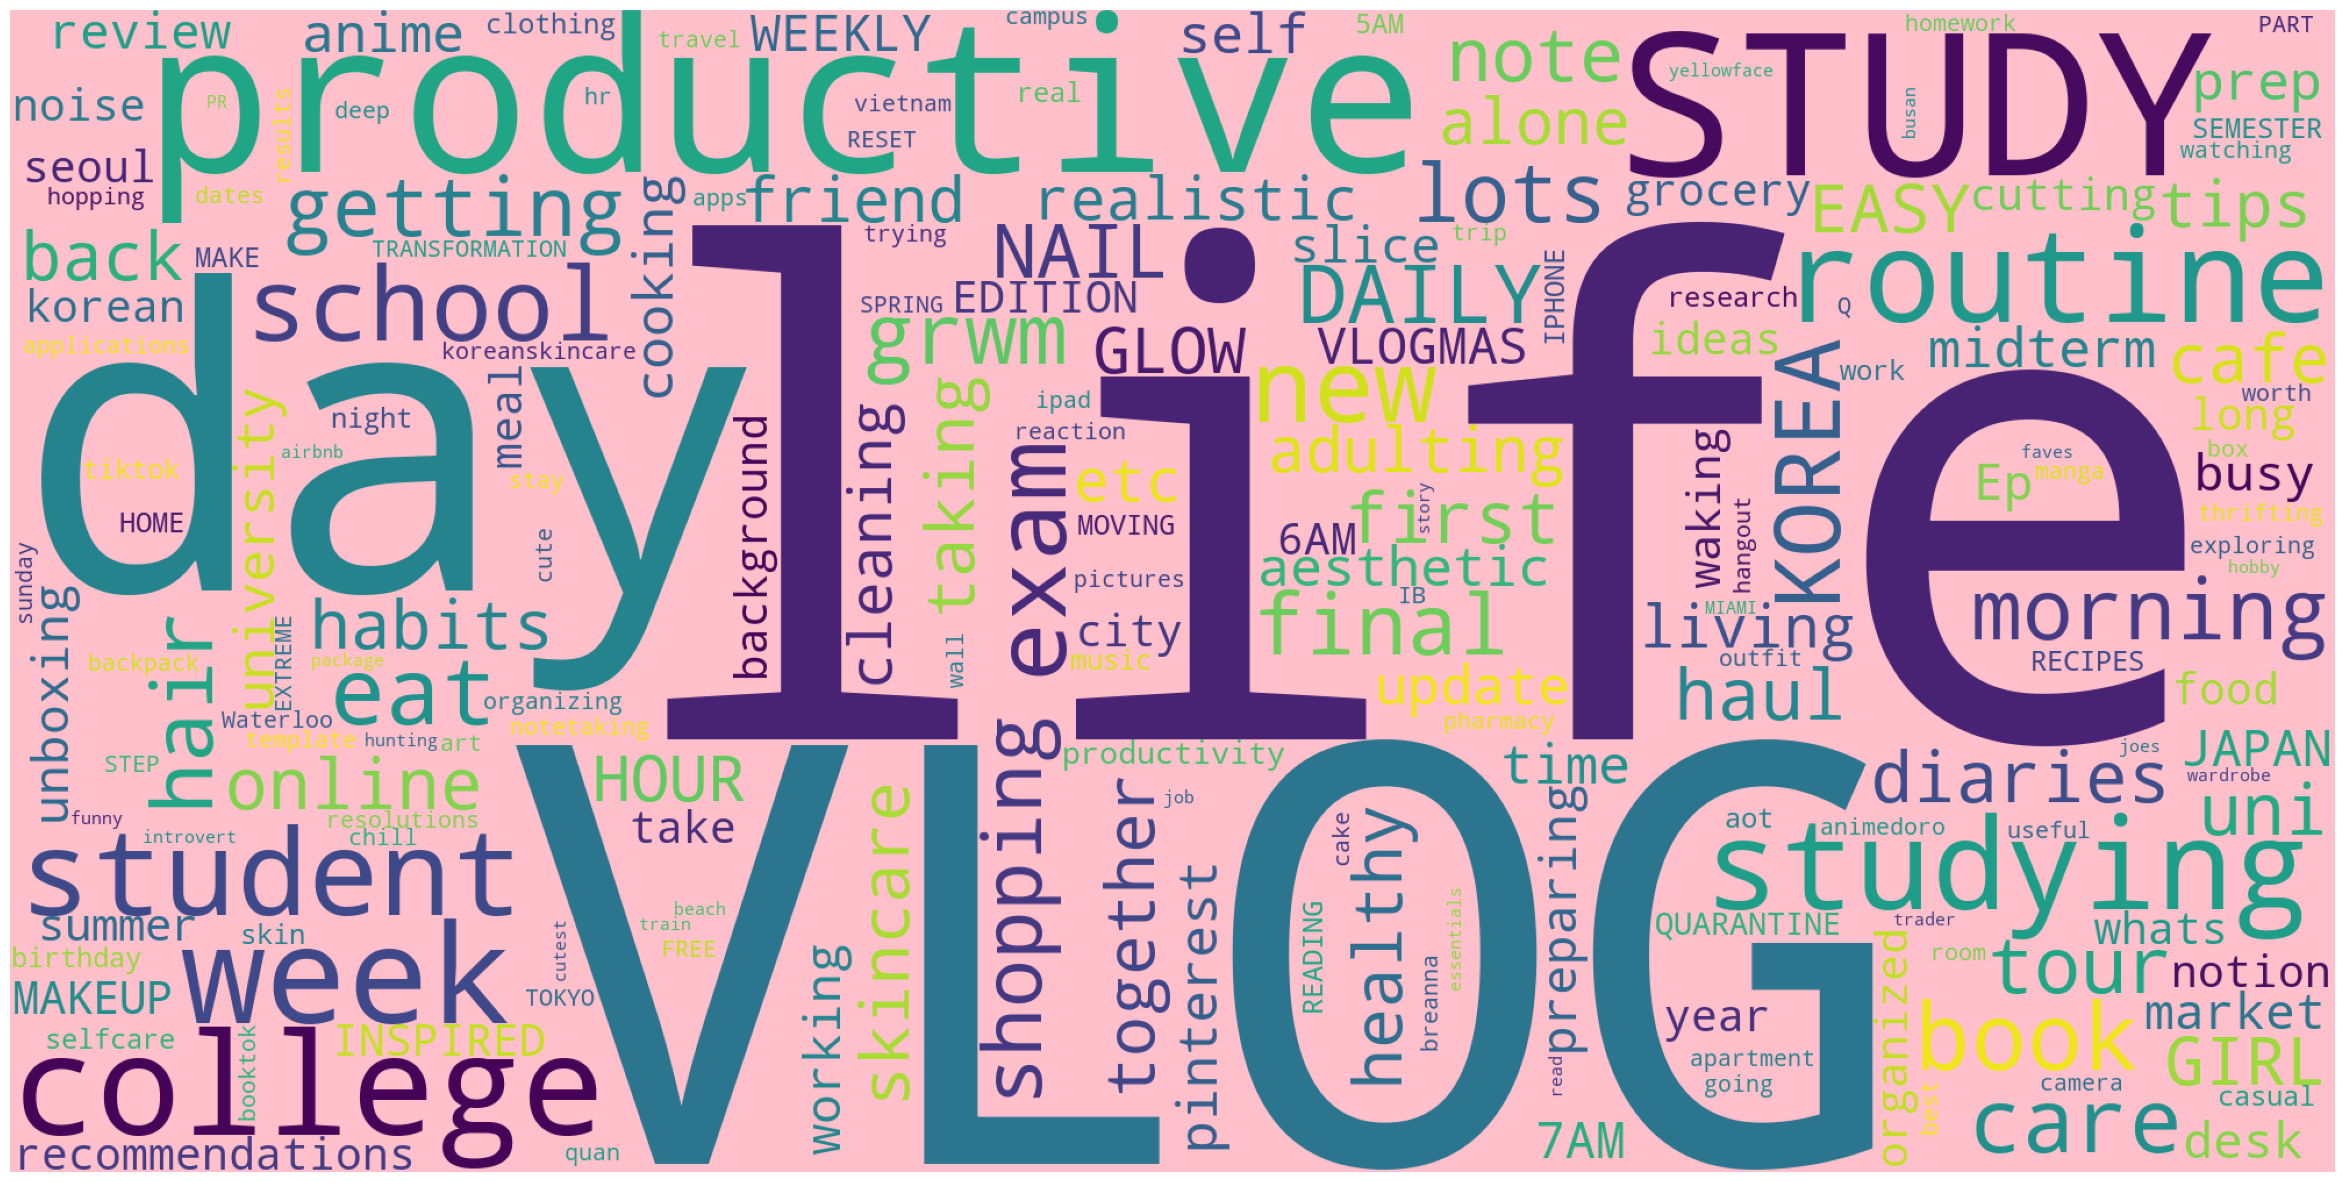

In [101]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='pink', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)